## Experiments: Comparing RSAST with other methods

In [1]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast\\sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/sast',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\sast',
 '/home/nirojasvar/random_sast\\cd_diagram',
 '/home/nirojasvar/random_sast/cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST\\cd_diagram',
 '/home/nirojasvar/random_sast/ExperimentationRSAST/cd_diagram']

In [2]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
hyperparameter='ACF&PACF: n_random_points=10 nb_inst_per_class=10'

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


### Reading Datasets

In [3]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [4]:
df_other_methods['method'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'TSF',
       'InceptionTime', 'TS-CHIEF', 'S-BOSS', 'STC', 'ResNet',
       'ProximityForest', 'WEASEL', 'Catch22', 'cBOSS'], dtype=object)

In [5]:
df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','ROCKET','STC','HIVE-COTEv1'])]

In [6]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

/tmp/ipykernel_9189/1477594906.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_9189/1477594906.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_9189/1477594906.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_9189/1477594906.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_9189/1477594906.py:27: FutureWarning: The default value of rege

In [7]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]

df_result.dataset_name.unique()


array(['MiddlePhalanxOutlineAgeGroup', 'FreezerSmallTrain', 'Wafer',
       'Earthquakes', 'Beef', 'DistalPhalanxOutlineAgeGroup', 'ECG200',
       'ShapeletSim', 'ItalyPowerDemand', 'ToeSegmentation2',
       'TwoLeadECG', 'ProximalPhalanxOutlineCorrect', 'CBF',
       'ToeSegmentation1', 'TwoPatterns', 'WordSynonyms', 'UMD',
       'Strawberry', 'FaceAll', 'GunPointMaleVersusFemale',
       'GunPointOldVersusYoung', 'PowerCons', 'SonyAIBORobotSurface2',
       'BirdChicken', 'ProximalPhalanxOutlineAgeGroup', 'Herring',
       'CricketY', 'FiftyWords', 'FreezerRegularTrain', 'Trace', 'Wine',
       'MiddlePhalanxOutlineCorrect', 'BeetleFly', 'FaceFour',
       'ProximalPhalanxTW', 'SwedishLeaf', 'SonyAIBORobotSurface1',
       'PhalangesOutlinesCorrect', 'ECG5000', 'GunPoint', 'Meat',
       'SmoothSubspace', 'DiatomSizeReduction', 'CricketZ', 'CricketX',
       'ChlorineConcentration', 'ElectricDevices', 'GunPointAgeSpan',
       'ECGFiveDays', 'Chinatown', 'Adiac', 'DistalPhalanxOut

In [8]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]

df_other_methods.columns

Index(['dataset_name', 'accuracy', 'classifier_name'], dtype='object')

In [9]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [10]:
concatenated_df['classifier_name'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'STC',
       'ACF&PACF: n_random_points=10 nb_inst_per_class=10'], dtype=object)

### Overall analysis

#### Accuracy: RSAST vs Other methods

/tmp/ipykernel_9189/2895071411.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


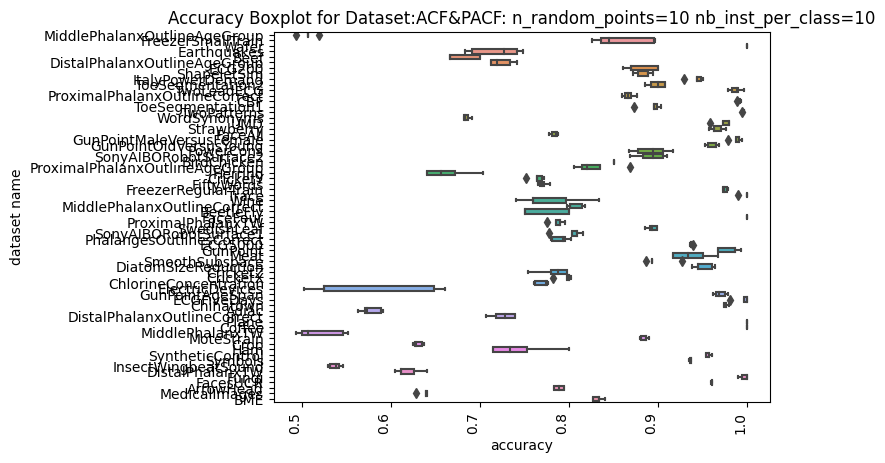

In [11]:
max_bx=max(df_result.accuracy)
min_bx=min(df_result.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=df_result, y='dataset_name', x='accuracy')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
#plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc/boxplot_acc'+str(df_result["classifier_name"].unique()[0])+'.png')

In [12]:
filter_param=concatenated_df[concatenated_df.classifier_name==hyperparameter]

In [13]:
stats = filter_param.groupby(['dataset_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
print(stats.round(2))

              mean  count   std  ci95_interval
dataset_name                                  
Adiac         0.58      5  0.01           0.01
ArrowHead     0.79      5  0.01           0.01
BME           0.83      5  0.01           0.00
Beef          0.68      5  0.02           0.02
BeetleFly     0.77      5  0.03           0.02
...            ...    ...   ...            ...
TwoPatterns   1.00      5  0.00           0.00
UMD           0.97      5  0.01           0.01
Wafer         1.00      5  0.00           0.00
Wine          0.78      5  0.04           0.03
WordSynonyms  0.68      5  0.00           0.00

[67 rows x 4 columns]


In [14]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=score_by_method.transpose()
t_score_by_method.round(2)
#t_score_by_method.round(2)[[hyperparameter,"SAST"]]

classifier_name,ACF&PACF: n_random_points=10 nb_inst_per_class=10,HIVE-COTEv1,ROCKET,SAST,STC
dataset_name,,,,,
Adiac,0.58,0.81,0.79,0.68,0.82
ArrowHead,0.79,0.83,0.79,0.77,0.70
BME,0.83,0.95,1.00,0.87,0.93
Beef,0.68,0.87,0.83,0.80,1.00
BeetleFly,0.77,0.95,0.90,0.80,0.80
...,...,...,...,...,...
TwoPatterns,1.00,1.00,1.00,0.99,0.99
UMD,0.97,0.98,0.99,0.98,0.94
Wafer,1.00,1.00,1.00,1.00,1.00


In [15]:
t_score_by_method[[hyperparameter,"SAST"]].describe().round(2)

classifier_name,ACF&PACF: n_random_points=10 nb_inst_per_class=10,SAST
count,67.00,67.00
mean,0.84,0.84
std,0.14,0.13
min,0.51,0.53
25%,0.77,0.76
50%,0.88,0.85
75%,0.96,0.96
max,1.00,1.00


In [16]:
total_wins=len(t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("winning RSAST: "+str(total_wins))

winning RSAST: 27


In [17]:
total_loss=len(t_score_by_method[0>(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("losse RSAST: "+str(total_loss))

losse RSAST: 25


In [18]:
total_draws=len(t_score_by_method[0==(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("draws: "+str(total_draws))

draws: 15


In [19]:
#wins of RSAST
t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))].index

Index(['ArrowHead', 'BirdChicken', 'CBF', 'Chinatown', 'ChlorineConcentration',
       'CricketX', 'CricketY', 'CricketZ', 'ECG200', 'Earthquakes', 'FacesUCR',
       'FreezerSmallTrain', 'Fungi', 'GunPoint', 'Ham', 'Herring', 'Meat',
       'MoteStrain', 'PhalangesOutlinesCorrect', 'ProximalPhalanxTW',
       'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'SwedishLeaf',
       'ToeSegmentation1', 'ToeSegmentation2', 'TwoLeadECG', 'TwoPatterns'],
      dtype='object', name='dataset_name')

In [20]:
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'], aggfunc='var').round(4)

,accuracy
classifier_name,
ACF&PACF: n_random_points=10 nb_inst_per_class=10,0.0189
HIVE-COTEv1,0.0144
ROCKET,0.0131
SAST,0.0164
STC,0.0155


/tmp/ipykernel_9189/3124073668.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_9189/3124073668.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_9189/3124073668.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.s

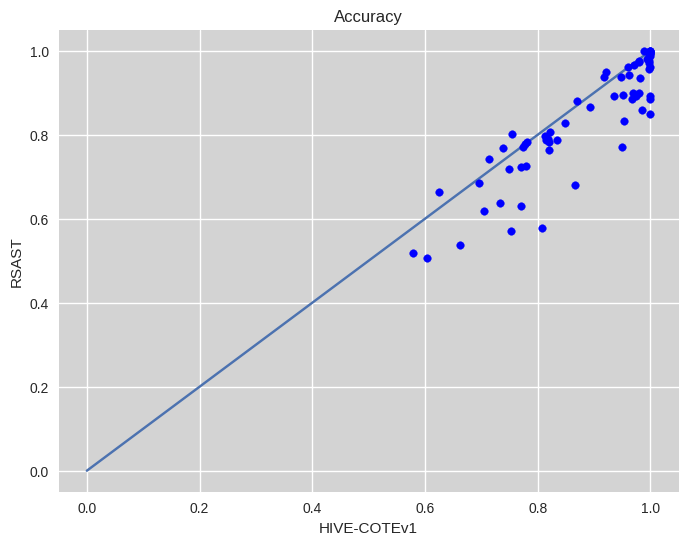

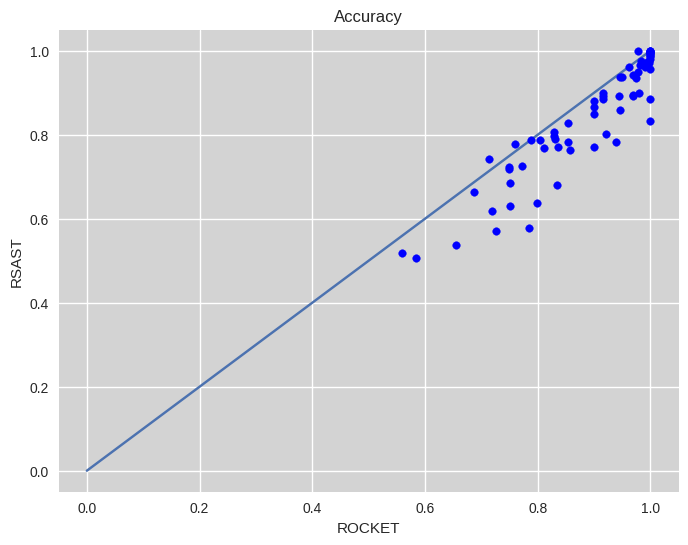

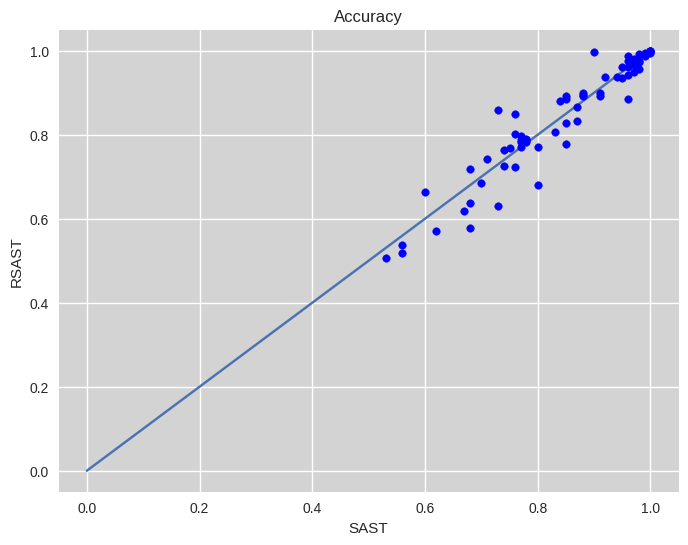

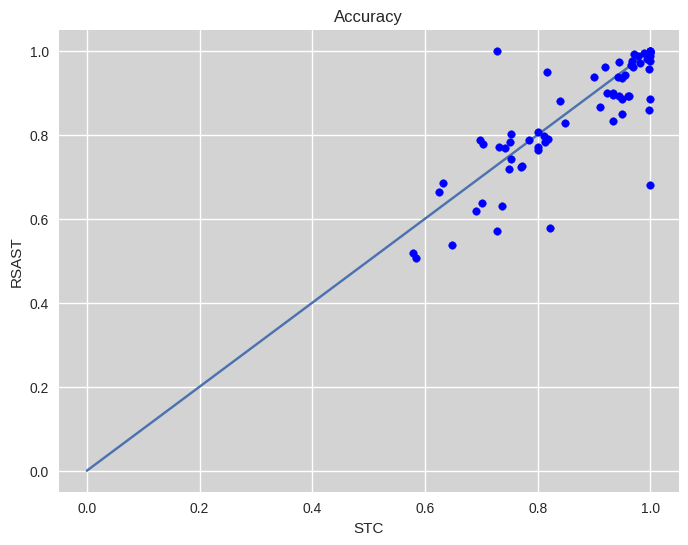

In [21]:
for method in t_score_by_method.columns.drop(hyperparameter):
    y=t_score_by_method[hyperparameter]
    x=t_score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel('RSAST')
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/RSASTvs'+method+'.png')


In [22]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points=10 nb_inst_per_class=10
dataset_name,
Adiac,37.744124
ArrowHead,0.754680
BME,0.147789
Beef,4.014065
BeetleFly,2.333761
...,...
TwoPatterns,5.016029
UMD,0.236920
Wafer,1.937638


In [23]:
# create a pivot table with the variation of score by hyperparameter
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='var')


dataset_name,Adiac,ArrowHead,BME,Beef,BeetleFly,BirdChicken,CBF,Chinatown,ChlorineConcentration,Coffee,...,SyntheticControl,ToeSegmentation1,ToeSegmentation2,Trace,TwoLeadECG,TwoPatterns,UMD,Wafer,Wine,WordSynonyms
classifier_name,,,,,,,,,,,,,,,,,,,,,
ACF&PACF: n_random_points=10 nb_inst_per_class=10,0.000146,0.000033,0.000031,0.000333,0.00075,0.0,0.000003,0.000006,0.000063,0.0,...,0.000008,0.00014,0.000101,0.00002,0.000044,0.000001,0.000082,0.0,0.001372,0.000016


#### Generate CD Diagram comparison

In [24]:
concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'], aggfunc='count')

,accuracy
classifier_name,
ACF&PACF: n_random_points=10 nb_inst_per_class=10,330
HIVE-COTEv1,66
ROCKET,66
SAST,66
STC,66


In [25]:
concatenated_df.classifier_name.unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'STC',
       'ACF&PACF: n_random_points=10 nb_inst_per_class=10'], dtype=object)

In [27]:

from cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, title="Overall Comparison Other Methods", fname='images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

{0: 'ACF&PACF: n_random_points=10 nb_inst_per_class=10', 1: 'SAST', 2: 'STC', 3: 'HIVE-COTEv1', 4: 'ROCKET'}
[0, 1]
[3, 4]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

In [28]:
df_perf["classifier_name"].unique()

array(['ACF&PACF: n_random_points=10 nb_inst_per_class=10', 'HIVE-COTEv1',
       'ROCKET', 'SAST', 'STC'], dtype=object)

In [29]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

,0
ACF&PACF: n_random_points=10 nb_inst_per_class=10,3.924242
SAST,3.795455
STC,3.143939
HIVE-COTEv1,2.181818
ROCKET,1.954545
